# 0. 이미지 전처리
더 나은 성능을 위해 전처리를 진행합니다
- 흑백으로 전환

# 1. 적응형 한계점

In [204]:
import cv2 as cv
import matplotlib.pyplot as plt

In [205]:
def imshow(arr):
    plt.imshow(cv.cvtColor(arr, cv.COLOR_BGR2RGB))

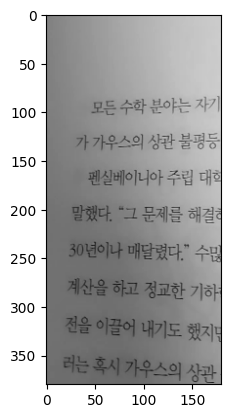

In [206]:
originalImage = cv.imread(r'E:\GithubProjects\HIDDEN\ImageFromVideo\tests\frame.png')
img = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)
imshow(img)

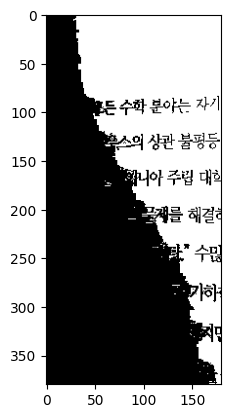

In [207]:
_,dst = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
imshow(dst)

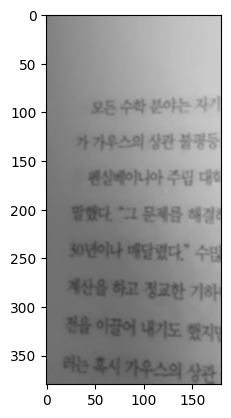

In [208]:
blur = cv.GaussianBlur(img, (5, 5), 0)
imshow(blur)

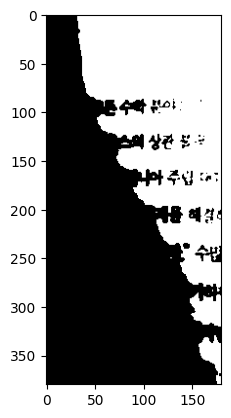

In [209]:
_,dst2 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
imshow(dst2)

In [210]:
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
cv.THRESH_BINARY,15,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv.THRESH_BINARY,15,2)

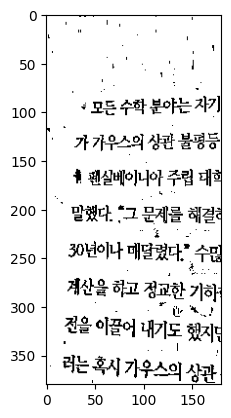

In [211]:
imshow(th2)

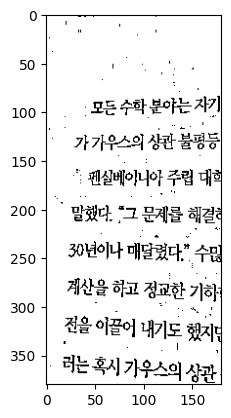

In [212]:
imshow(th3)

# 2. 가우시안 블러와 적응형 한계점

# gaussian blur -> adaptive

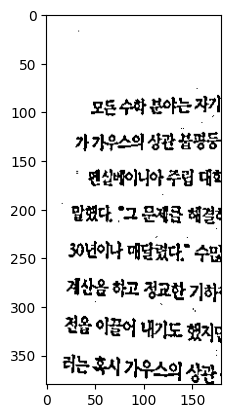

In [213]:
blur = cv.GaussianBlur(img, (3, 3), 0)
th3 = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv.THRESH_BINARY,15,2)
imshow(th3)

gaussian -> adaptive -> erosion

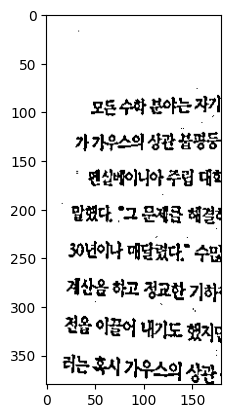

In [214]:
a = cv.GaussianBlur(img, (3, 3), 0)
# a = img.copy()
a = cv.adaptiveThreshold(a,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv.THRESH_BINARY,15,2)
k = cv.getStructuringElement(cv.MORPH_RECT, (1,1))
a = cv.dilate(a, k)
clearImage1 = a
imshow(clearImage1)

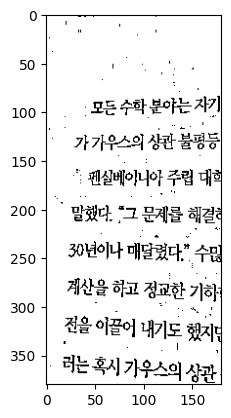

In [215]:
b = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv.THRESH_BINARY,15,2)
k = cv.getStructuringElement(cv.MORPH_RECT, (1,1))
b = cv.dilate(b, k)
clearImage2 = b
imshow(b)

# 3. 텍스트 영역 전처리와 추출

# Image Cut

In [216]:
import numpy as np

In [217]:
gray = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)
(H, W) = gray.shape
 
rectKernel = cv.getStructuringElement(cv.MORPH_RECT, (30, 20))
# sqKernel = cv.getStructuringElement(cv.MORPH_RECT, (50, 21))
 
gray = cv.GaussianBlur(gray, (11, 11), 0)
blackhat = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, rectKernel)
 
grad = cv.Sobel(blackhat, ddepth=cv.CV_32F, dx=1, dy=0, ksize=-1)
grad = np.absolute(grad)
(minVal, maxVal) = (np.min(grad), np.max(grad))
grad = (grad - minVal) / (maxVal - minVal)
grad = (grad * 255).astype("uint8")
 
grad = cv.morphologyEx(grad, cv.MORPH_CLOSE, rectKernel)
thresh = cv.threshold(grad, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

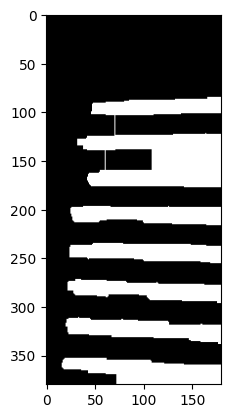

In [218]:
imshow(thresh)

In [219]:
def addIt(arr : np.ndarray, size : tuple):
	k = cv.getStructuringElement(cv.MORPH_RECT, size)
	return cv.dilate(arr, k)

def subtractIt(arr : np.ndarray, size : tuple):
	k = cv.getStructuringElement(cv.MORPH_RECT, size)
	return cv.erode(arr, k)

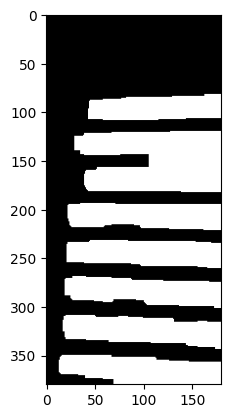

In [220]:
maskImage = addIt(subtractIt(thresh, (2, 2)), (10, 10))
imshow(maskImage)

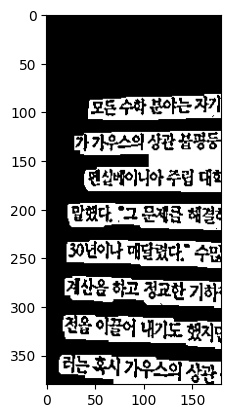

In [221]:
imshow(maskImage & clearImage1)

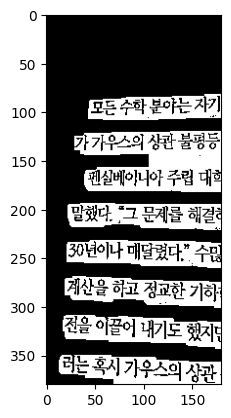

In [222]:
imshow(maskImage & clearImage2)

In [223]:
np.full((clearImage2.shape), 255, dtype=np.uint16)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint16)

In [224]:
dst = np.full((clearImage2.shape), 255, dtype=np.uint16)
mask = maskImage
src = clearImage2
idx = (mask!=0)
dst[idx] = src[idx]

In [225]:
convertedImage = dst

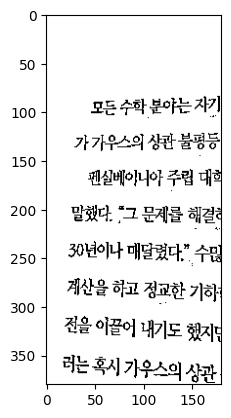

In [226]:
imshow(convertedImage)

In [252]:
from PIL import Image
im = Image.fromarray(np.uint8(convertedImage))
im.save("./tests/clearImage.png")

# 4. 테서렉트 테스트

In [228]:
import pytesseract
from PIL import Image
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.__version__

'0.3.10'

In [229]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [230]:
def showText(img, config:str):
	pointDatas = pytesseract.image_to_boxes(img, config=config)
	
	fig, ax = plt.subplots(figsize=(10, 7))
	ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
	h, w = img.shape[:2]
	outputText = ""
	for data in pointDatas.split(' 0\n'):
		try:
			a,b,c,d,e=data.split(' ')
		except:
			break
		txt, x1, y1, x2, y2 = data.split(' ')
		x1 = int(x1)
		y1 = h - int(y1)
		x2 = int(x2)
		y2 = h - int(y2)
		
		outputText += txt
		rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
		ax.add_patch(rect)
		ax.text(x1, y1, txt, {"family" : "Gulim", "color" : "red", "size":16})
	print(outputText)

)가우스의상관불평등겐심베이니아주림대계산을하고정교한기하:


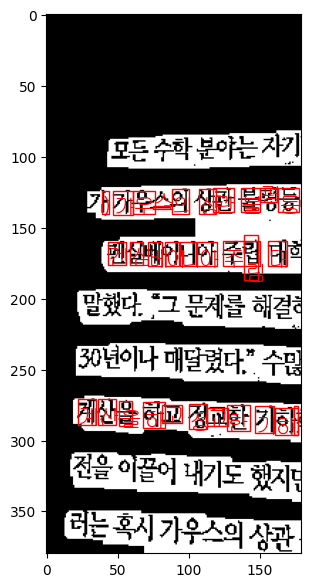

In [231]:
showText(maskImage & clearImage2, config=('-l kor --oem 3 --psm 11'))

psm 값 1, 3, 4, 6, 7, 8, 9, 10, 13 이 적절

[모든수학분아는자기


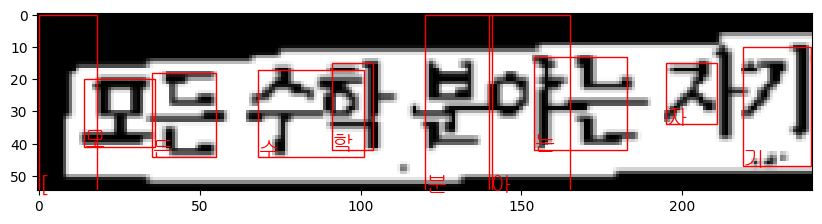

In [232]:
showText(cv.imread(r"E:\GithubProjects\HIDDEN\ImageFromVideo\tests\piece.png"),
         ('-l kor --oem 3 --psm 13'))

# 5. OCR 성능을 높이기 위한 이미지 자르기

In [233]:
import numpy as np

def getBoundedImages(targetImage, maskImage, showImage = False):
	targetImage = maskImage & targetImage
	img = cv.cvtColor(maskImage.astype(np.uint8), cv.COLOR_GRAY2BGR)
	gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
	
	if showImage:
		fig, ax = plt.subplots(figsize=(10, 7))
		ax.imshow(cv.cvtColor(targetImage, cv.COLOR_BGR2RGB))

	cutImage = []
	contours, hierarchy = cv.findContours(gray, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
	for contour in contours:
		x, y, w, h = cv.boundingRect(contour)

		# img = cv.drawContours(img, [contour], -1, (0, 0, 255), 2)
		# cv.rectangle(img, (x,y), (x+w,y+h), (0, 255, 0), 2)
		if showImage:
			rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="red", facecolor='none')
			ax.add_patch(rect)
		cutImage.append(targetImage[y:y+h,x:x+w])
	cutImage = np.array(cutImage)
	return cutImage

C:\Users\th070\AppData\Local\Temp\ipykernel_12876\1468667794.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cutImage = np.array(cutImage)


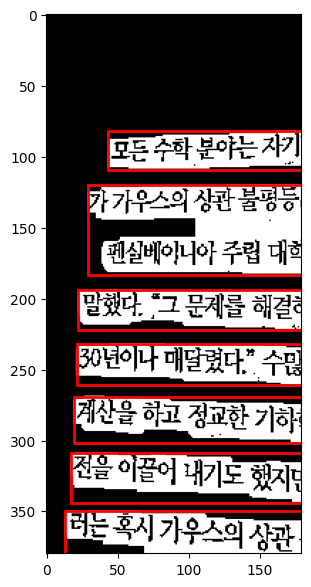

In [234]:
cutImage = getBoundedImages(clearImage2, maskImage, showImage=True)

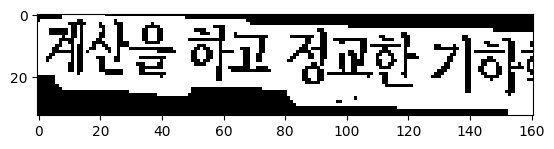

In [235]:
imshow(cutImage[2])

역 정렬 되어있음

In [236]:
cutImage = cutImage[::-1]

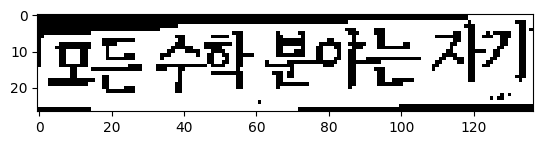

In [237]:
imshow(cutImage[0])

정렬 잘 됨

모든수학분야는자기


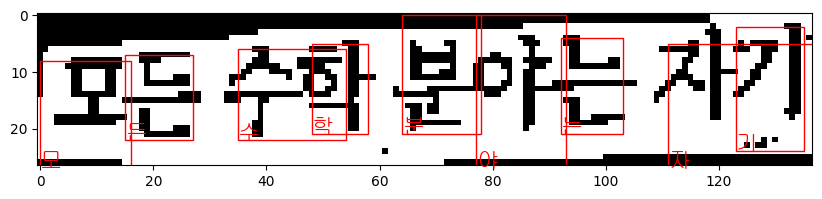

In [238]:
showText(cutImage[0],
         ('-l kor --oem 3 --psm 13'))

이벼


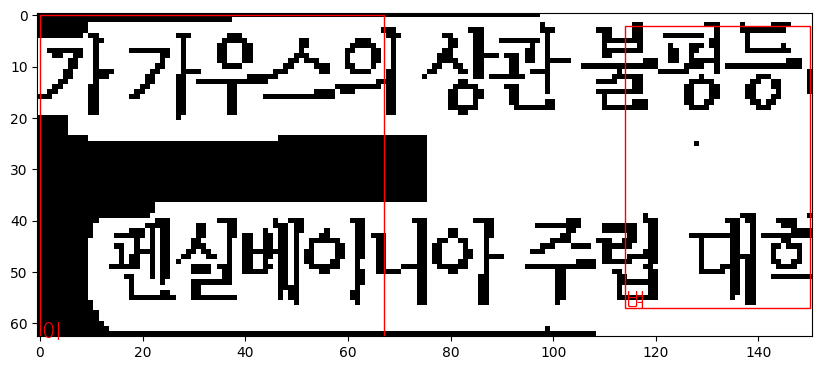

In [239]:
showText(cutImage[1],
         ('-l kor --oem 3 --psm 13'))

이처럼 2줄이 될 경우 psm 값을 변경해야함

한실베이니아주립대


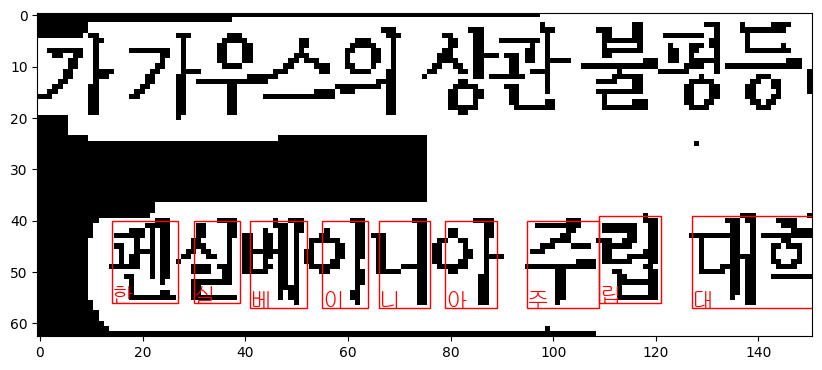

In [240]:
showText(cutImage[1],
         ('-l kor --oem 3 --psm 12'))

흠????????????

ㅇ.. 저런 경우를 컷 해야 되는 것이다

height 를 비교해주자

In [241]:
heights = []
for x in cutImage:
    h = x.shape[0]
    heights.append(h)
heightAverage = sum(heights) / len(cutImage)
print(f"average {heightAverage}")

average 35.0


In [242]:
heights

[27, 63, 28, 29, 33, 35, 30]

In [243]:
np.median(heights)

30.0

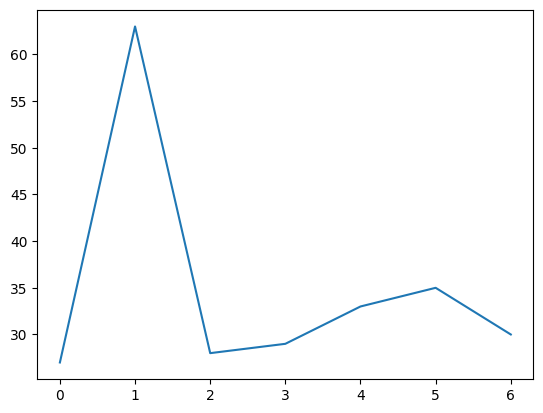

In [244]:
plt.plot(heights)

In [245]:
cutHeights = heights - np.full((len(heights)), np.min(heights), dtype=np.uint16)
cutHeights

array([ 0, 36,  1,  2,  6,  8,  3])

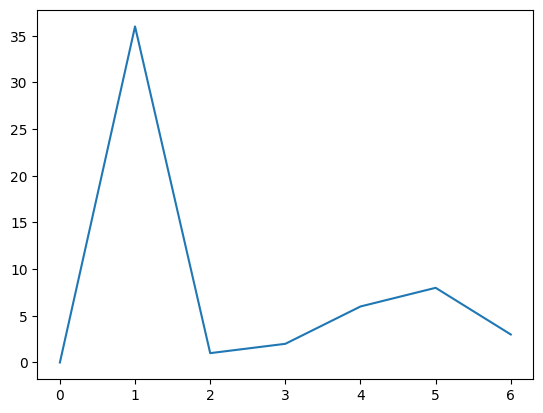

In [246]:
plt.plot(cutHeights)

In [247]:
realCutImage = []
meanValue = np.mean(cutHeights)
minValue = np.min(heights)
for i, x in enumerate(cutHeights):
	if x > meanValue:
		print(i, x)
		imageCount = heights[i]/(meanValue + minValue)
		h = cutImage[i].shape[0]
		# print(int(h/imageCount))
		for loopNum in range(round(imageCount)):
			splitedImage = cutImage[i][loopNum*int(h/imageCount):(loopNum+1)*int(h/imageCount),:]
			splitedImage = getBoundedImages(splitedImage, splitedImage)[0]
			realCutImage.append(
				splitedImage
			)
	else:
		# pass
		realCutImage.append(cutImage[i])
realCutImage = np.array(realCutImage)

1 36


C:\Users\th070\AppData\Local\Temp\ipykernel_12876\2521240200.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  realCutImage = np.array(realCutImage)


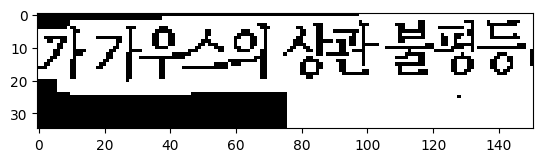

In [248]:
imshow(realCutImage[1])

가가우스의상관블흥


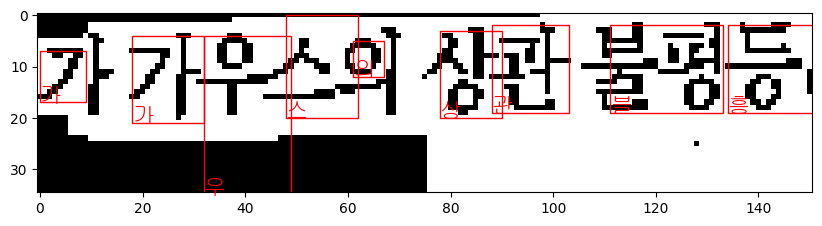

In [249]:
showText(realCutImage[1],
         ('-l kor --oem 3 --psm 13'))

펜실베이니아주립대호


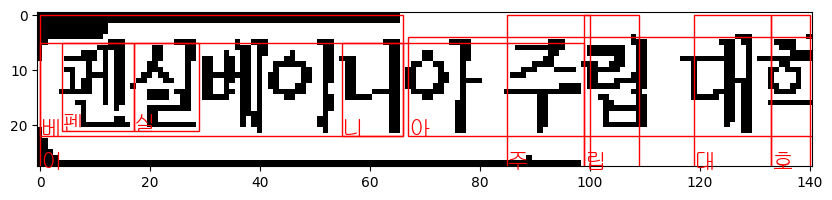

In [250]:
showText(realCutImage[2],
         ('-l kor --oem 3 --psm 13'))

# 6. 전체 텍스트

모든수학분야는자기
가가우스의상관물병
펜실베이니아주립대호
말했다.;그문제를헤결6
30년이나매달렸다”수밀
계산을하고정교한기하:
신음이끊어내기도했지[
디는옥시가우스의상관.


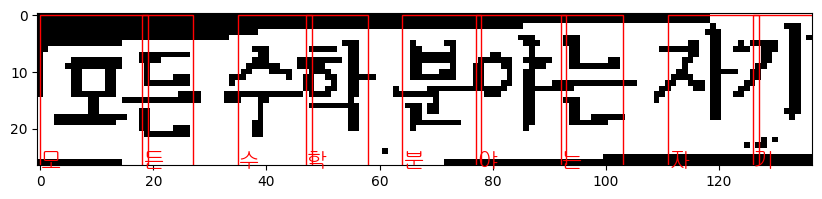

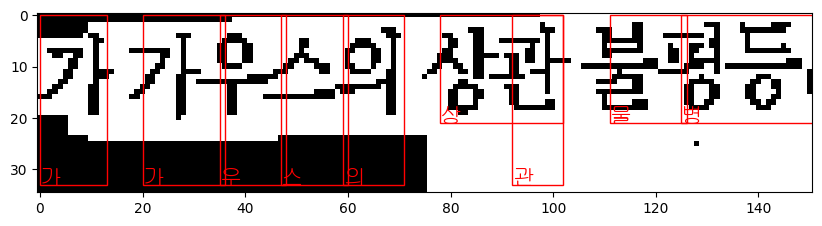

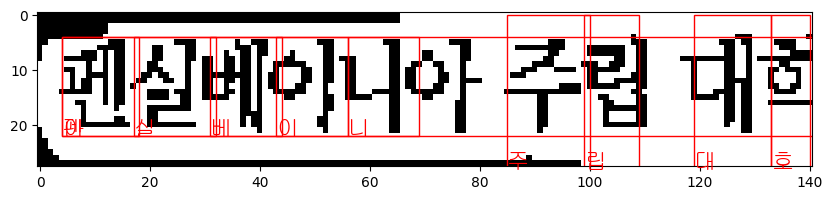

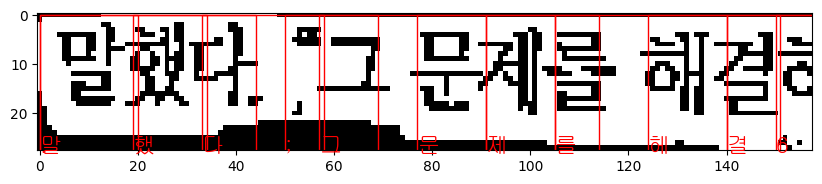

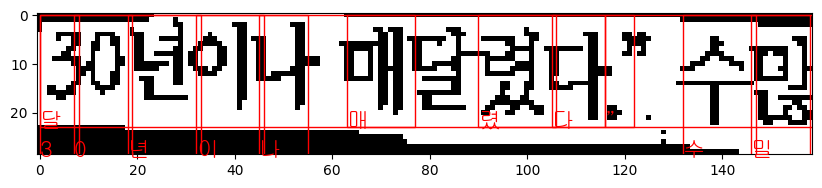

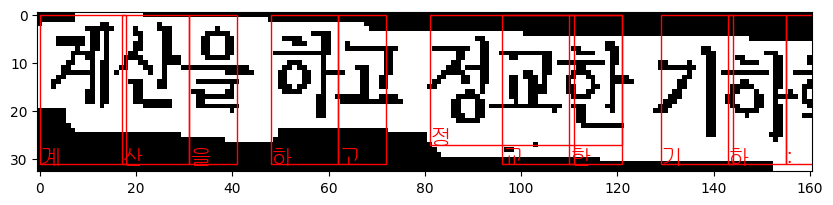

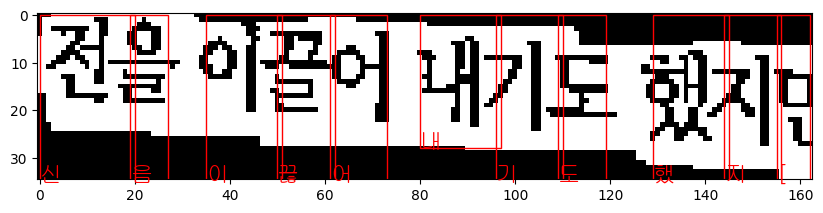

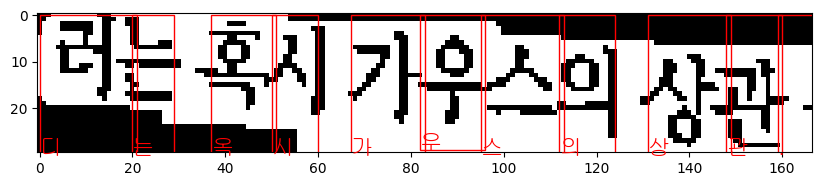

In [251]:
for img in realCutImage:
	showText(img,
			('-l kor --oem 3 --psm 10'))